In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
con = sqlite3.connect("../laliga.sqlite")
df = pd.read_sql_query("SELECT * from Matches", con)

In [3]:
df.head()

,season,division,matchday,date,time,home_team,away_team,score
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2


## Exercise 1
Extract the result from the score: Giving 1 if the home team won, 2 if the away team won and X if it was a tie

In [4]:
def get_result(score: str):
    if score is None:
        return None
    goals = list(map(int, score.split(':')))
    if goals[0]>goals[1]:
        return "1"
    elif goals[1]>goals[0]:
        return "2"
    else:
        return "X"

In [5]:
df['result'] = df['score'].apply(get_result)
df['result'] = df['result'].map(str)

In [6]:
df.head()

,season,division,matchday,date,time,home_team,away_team,score,result
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,1
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,1
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,X
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,2


In [7]:
df_past = df.loc[df['season'] != '2021-2022'].copy()

In [8]:
df_past.tail()

,season,division,matchday,date,time,home_team,away_team,score,result
48173,2020-2021,2,42,5/30/21,9:00 PM,CD Mirandés,CE Sabadell,0:2,2
48174,2020-2021,2,42,5/30/21,9:00 PM,Ponferradina,RCD Mallorca,2:2,X
48175,2020-2021,2,42,5/30/21,9:00 PM,Rayo Vallecano,CD Lugo,0:1,2
48176,2020-2021,2,42,5/30/21,9:00 PM,Real Zaragoza,CD Leganés,0:5,2
48177,2020-2021,2,42,5/30/21,9:00 PM,Sporting Gijón,UD Almería,0:2,2


<AxesSubplot:ylabel='result'>

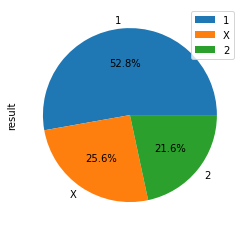

In [9]:
df_past['result'].value_counts().plot.pie(autopct='%1.1f%%', legend=True)

We see that it is indeed true that the home time is most likely to win.

## Exercise 2
### Most goals scored/conceded

In [10]:
def get_goals(score: str, home_away: int):
    if score is None:
        return None
    goals = list(map(int, score.split(':')))
    return goals[home_away]

In [11]:
df['home_goals'] = df['score'].apply(get_goals, args=(0,))
df['away_goals'] = df['score'].apply(get_goals, args=(1,))
df.head()

,season,division,matchday,date,time,home_team,away_team,score,result,home_goals,away_goals
0,1928-1929,1,1,2/10/29,None,Arenas Club,Athletic Madrid,2:3,2,2.0,3.0
1,1928-1929,1,1,2/10/29,None,Espanyol,Real Unión,3:2,1,3.0,2.0
2,1928-1929,1,1,2/10/29,None,Real Madrid,Catalunya,5:0,1,5.0,0.0
3,1928-1929,1,1,2/10/29,None,Donostia,Athletic,1:1,X,1.0,1.0
4,1928-1929,1,1,2/12/29,None,Racing,Barcelona,0:2,2,0.0,2.0


In [12]:
goals_scored = df.loc[df['division']==1].groupby('home_team').sum()['home_goals'] \
             + df.loc[df['division']==1].groupby('away_team').sum()['away_goals']
goals_conceded = df.loc[df['division']==1].groupby('home_team').sum()['away_goals'] \
               + df.loc[df['division']==1].groupby('away_team').sum()['home_goals']

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Goals conceded'}, xlabel='Team'>

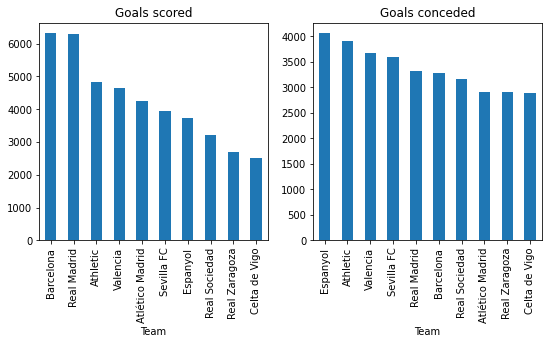

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
goals_scored.sort_values(ascending=False).head(10).plot.bar(ax = ax[0], title='Goals scored', xlabel="Team")
goals_conceded.sort_values(ascending=False).head(10).plot.bar(ax = ax[1], title = 'Goals conceded', xlabel="Team")

### Biggest wins

In [14]:
df['abs_goal_diff'] = abs(df['home_goals']-df['away_goals']) 
df['max_goals'] = df[['home_goals', 'away_goals']].max(axis=1)

In [15]:
df.loc[df['division']==1].sort_values(by=['abs_goal_diff', 'max_goals'], ascending=False).head(10)[['date', 'home_team', 'away_team', 'score']].reset_index(drop=True)

,date,home_team,away_team,score
0,2/8/31,Athletic,Barcelona,12:1
1,9/29/40,Sevilla FC,Barcelona,11:1
2,9/28/41,Sevilla FC,Real Oviedo,10:0
3,1/11/42,Athletic,Celta de Vigo,10:0
4,11/19/50,Athletic,Lérida,10:0
5,2/7/60,Real Madrid,Elche CF,11:2
6,9/11/49,Barcelona,Gimnàstic,10:1
7,10/23/49,Celta de Vigo,Gimnàstic,10:1
8,11/5/50,Dep. La Coruña,Lérida,10:1
9,9/23/51,Athletic,Real Zaragoza,10:1


## Exercise 3

In [51]:
def season_time_stats(season: str):
    datetime_dates = pd.to_datetime(df.loc[df['season']==season, 'date'])
    datetime_dates[datetime_dates.dt.year >= 2023] -= pd.DateOffset(years=100)
    
    datetime_times = pd.to_datetime(df.loc[df['season']==season, 'time'])
    weekdays = datetime_dates.dt.day_name()
    times = datetime_times.dt.hour + datetime_times.dt.minute/60
    fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    weekdays.value_counts().plot.bar(ax=axs[0], title="Distribution weekdays")
    times.plot.hist(ax=axs[1], title="Distribution kick-off time", bins=np.linspace(12,22,40, endpoint=False), grid=True)
    axs[1].set_xticks(np.arange(12,23))
    plt.suptitle("Matchtime statistics for season "+season)

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


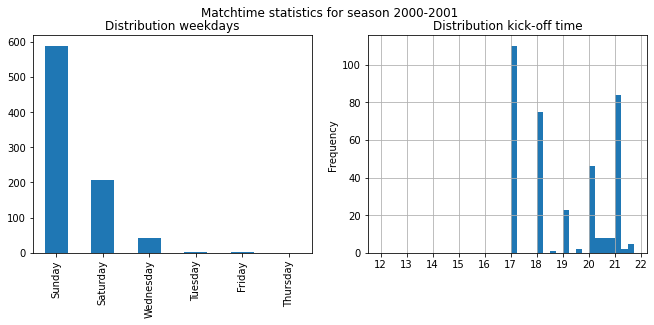

In [52]:
season_time_stats('2000-2001')

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


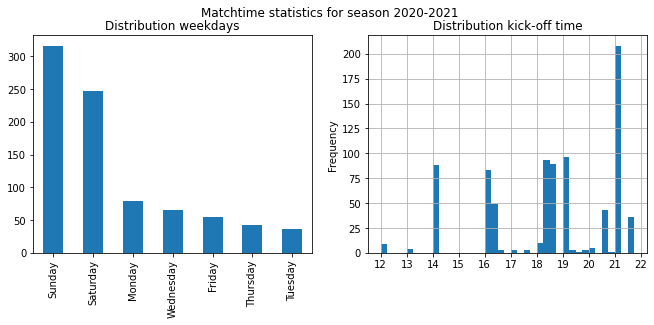

In [53]:
season_time_stats('2020-2021')

We see that compared to 2000-2001 there are now way more matches on weekdays. Also, there are now matches in the early afternoon and more possible kick-off times between 18:00 and 22:00.

## Exercise 4

In [19]:
def plot_cross_results_table(season: str):
    df_season = df.loc[(df['season']==season) & (df['division']==1)].copy()
    df_season['goal_diff'] = df_season['home_goals'] - df_season['away_goals']
    cross_tab = df_season.pivot(index='home_team', columns='away_team', values='score')
    cross_tab[cross_tab.isna()] = '-'
    col_tab = df_season.pivot(index='home_team', columns='away_team', values='goal_diff')
    
    fig, ax = plt.subplots(figsize=(10,7))
    col_abs = [col[:3] for col in cross_tab.columns.to_list()]
    colormap = cm.get_cmap('RdYlGn')
    colors = colormap(col_tab.to_numpy()/10+0.5)

    ax.axis("off")
    table = ax.table(cellText=cross_tab.to_numpy(), cellColours=colors, rowLabels=cross_tab.index.to_list(), colLabels=col_abs, loc='center', cellLoc='center')
    return table

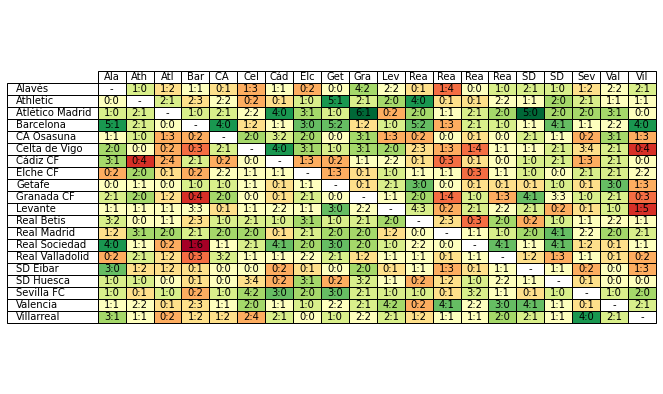

In [20]:
plot_cross_results_table('2020-2021')

## Exercise 5

In [64]:
def plot_direct_confrontations_stats(team1: str, team2: str):
    df_home_team1 = df.loc[(df['home_team']==team1) & (df['away_team']==team2) & (df['season']!='2021-2022')].copy()
    df_home_team2 = df.loc[(df['home_team']==team2) & (df['away_team']==team1) & (df['season']!='2021-2022')].copy()
    df_both = pd.concat([df_home_team1, df_home_team2]).groupby('home_team').sum()

    df_goals = pd.Series([df_both.loc[team1, 'home_goals']+df_both.loc[team2, 'away_goals'],
                          df_both.loc[team1, 'away_goals']+df_both.loc[team2, 'home_goals']],
                          index=[team1, team2])
    df_home_team1.rename(columns={'home_goals': 'team1_goals', 'away_goals': 'team2_goals'}, inplace=True)
    df_home_team2.rename(columns={'home_goals': 'team2_goals', 'away_goals': 'team1_goals'}, inplace=True)

    df_home_team2['result'].replace({'1':'2', '2':'1'}, inplace=True)
    df_results = df_home_team1['result'].value_counts() + df_home_team2['result'].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(9,4))
    df_results.plot.pie(ax=axs[0],
                        autopct='%1.1f%%',
                        labels=[team1, team2, 'tie'],
                        title="Win/Lose statistic",
                        legend=False)
    axs[0].set_ylabel('')
    axs[0].legend(df_results)
    df_goals.plot.pie(ax=axs[1], title="Total goals scored", autopct='%1.1f%%', legend=False)
    axs[1].legend(df_goals.astype(int))
    axs[1].set_ylabel('')
    return axs

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'Win/Lose statistic'}>,
       <AxesSubplot:title={'center':'Total goals scored'}>], dtype=object)

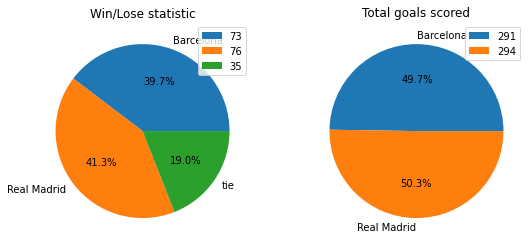

In [65]:
plot_direct_confrontations_stats('Barcelona', 'Real Madrid')

c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
c:\Users\parap\Qsync\Uni\Module\Master\3_Semester\Research and Innovation\01_Introduction to Python\la-quiniela\.venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'Win/Lose statistic'}>,
       <AxesSubplot:title={'center':'Total goals scored'}>], dtype=object)

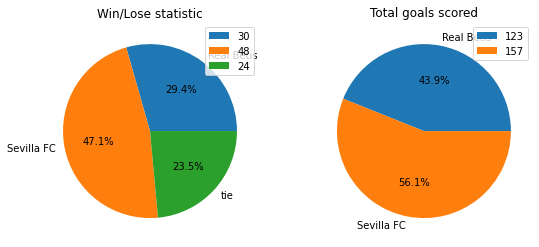

In [66]:
plot_direct_confrontations_stats('Real Betis', 'Sevilla FC')

## Exercise 6

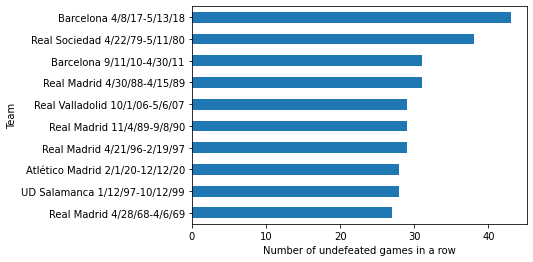

In [67]:
df_past = df.loc[df['season'] != '2021-2022'].copy()
df_past['home_goals'] = df_past['home_goals'].astype(int)
df_past['away_goals'] = df_past['away_goals'].astype(int)
teams = df_past['home_team'].drop_duplicates().reset_index(drop=True)
df_streaks = pd.DataFrame([], columns=['length', 'team', 'start', 'end'])
for team in teams:
    df_home_team = df_past.loc[df['home_team']==team].copy()
    df_home_team['team_lost'] = df_home_team['result']=='2'
    df_away_team = df_past.loc[df['away_team']==team].copy()
    df_away_team['team_lost'] = df_away_team['result']=='1'
    df_team = pd.concat([df_home_team, df_away_team]).sort_index().reset_index(drop=True)
    lost = df_team.index[df_team['team_lost']].to_numpy()
    streaks = list(zip(lost[1:]-lost[:-1]-1, [team for _ in lost[1:]], df_team['date'].iloc[lost[:-1]], df_team['date'].iloc[lost[1:]]))
    df_streaks = df_streaks.append(pd.DataFrame(streaks, columns=['length', 'team', 'start', 'end']))

df_streaks = df_streaks.sort_values(by='length', ascending=False).head(n=10)[::-1]
ax = df_streaks.plot.barh(x='team', y='length', legend=False)
ax.set_xlabel('Number of undefeated games in a row')
ax.set_ylabel('Team')
labels = df_streaks['team']+' '+df_streaks['start']+'-'+df_streaks['end']
ax.set_yticklabels(labels)
plt.show()

## Exercise 7

In [25]:
dfs = []
for season in df_past['season'].drop_duplicates():
    for division in df_past.loc[(df_past['season']==season), 'division'].drop_duplicates():
        df_games = df_past.loc[(df_past['season']==season) & (df_past['division']==division)].copy()
        df_games['home_points'] = df_games['result'].replace({'1':3, 'X':1, '2':0})
        df_games['away_points'] = df_games['result'].replace({'1':0, 'X':1, '2':3})
        df_home = df_games.groupby('home_team').sum()[['home_goals', 'away_goals', 'home_points']].rename(columns={'home_goals':'GF', 'away_goals': 'GA', 'home_points': 'Pts'})
        df_away = df_games.groupby('away_team').sum()[['away_goals', 'home_goals', 'away_points']].rename(columns={'away_goals':'GF', 'home_goals': 'GA', 'away_points': 'Pts'})
        df_home_results = df_games.groupby('home_team')['result'].value_counts().rename('result_count').reset_index().pivot('home_team', 'result', 'result_count').rename(columns={'1':'W', 'X':'T', '2':'L'}).fillna(0)
        df_away_results = df_games.groupby('away_team')['result'].value_counts().rename('result_count').reset_index().pivot('away_team', 'result', 'result_count').rename(columns={'1':'L', 'X':'T', '2':'W'}).fillna(0)
        df_home = df_home.join(df_home_results)
        df_away = df_away.join(df_away_results)
        df_standings = df_home+df_away
        df_standings.insert(0, 'division', division)
        df_standings.insert(0, 'season', season)
        df_standings['GD'] = df_standings['GF'] - df_standings['GA']
        df_standings.sort_values(by=['Pts', 'GD', 'GF'], ascending=False, inplace=True)
        df_standings['rank'] = np.arange(1, len(df_standings)+1)
        df_standings = df_standings.reset_index().rename(columns={'home_team':'team'})[['season', 'division', 'rank', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts']]
        dfs.append(df_standings)
df_standings_all = pd.concat(dfs, ignore_index=True)
df_standings_all.to_excel('../reports/SeasonStandingsJannik.xlsx', index=False)

## Exercise 8

In [26]:
def plot_ranking_evolution(*args):
    seasons = [str(s1)+'-'+str(s2) for (s1, s2) in zip(np.arange(1926,2021), np.arange(1927, 2021))]
    df_standings = pd.read_excel('../reports/SeasonStandingsJannik.xlsx', engine='openpyxl')
    series = []
    for team in args:
        df_team_standings = df_standings.loc[df_standings['team']==team].copy().set_index('season')
        plot_rank = (df_team_standings['division']-1)*20 + df_team_standings['rank']
        plot_rank = plot_rank.reindex(seasons).rename(team)
        series.append(plot_rank)
    df_plot_ranks = pd.concat(series, axis=1)
    df_plot_ranks.plot.line(figsize=(12, 4), style='.-', legend=False).axhline(y=20.5, color='black')
    ax = plt.gca()
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    ax.minorticks_on()
    ax.set_yticks([1, 6, 11, 16, 21, 26, 31, 36, 41])
    ax.set_yticklabels([1, 6, 11, 16, 1, 6, 11, 16, 21])
    ax.grid(True, which='both')
    return ax

<AxesSubplot:xlabel='season'>

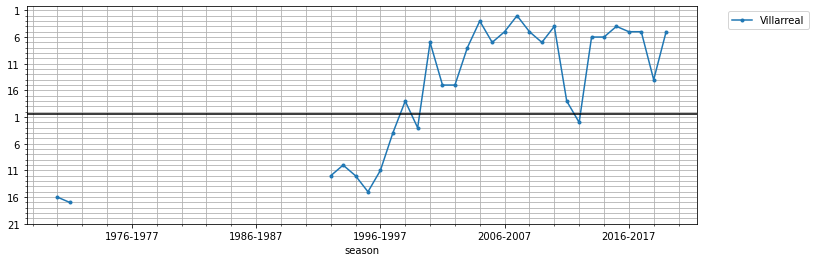

In [27]:
plot_ranking_evolution('Villarreal')

These are the rankings of all Catalan teams which have played in the first division at least once:

<AxesSubplot:xlabel='season'>

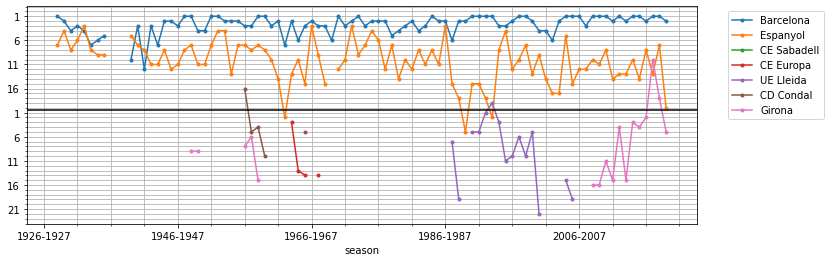

In [28]:
plot_ranking_evolution('Barcelona', 'Espanyol', 'CE Sabadell', 'CE Europa', 'UE Lleida', 'CD Condal', 'Girona')

The rankings of all other Catalan teams in the data are shown here:

<AxesSubplot:xlabel='season'>

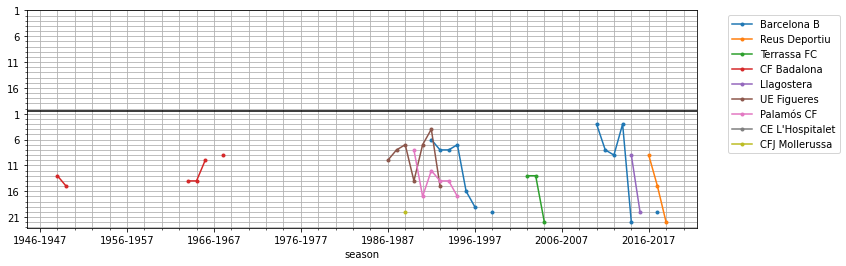

In [29]:
plot_ranking_evolution('Barcelona B', 'Reus Deportiu', 'Terrassa FC', 'CF Badalona', 'Llagostera', 'UE Figueres', 'Palamós CF', 'CE L\'Hospitalet', 'CFJ Mollerussa')

## Exercise 9

In [30]:
teams = df['home_team'].drop_duplicates()
all_changes = []
for team in teams:
    divisions = df.loc[((df['home_team']==team) | (df['away_team']==team)) & (df['matchday']==1)].sort_values(by='season')['division'].to_numpy()
    changes = sum(abs(divisions[1:]-divisions[:-1]))
    all_changes.append(changes)
df_changes = pd.Series(all_changes, index=teams)
df_changes.sort_values(ascending=False)

home_team
Dep. La Coruña    20
Racing            17
Celta de Vigo     17
Rayo Vallecano    15
Real Murcia       14
                  ..
Barcelona Atl.     0
Cartagena FC       0
Sestao River       0
Racing Ferrol      0
CF Badalona        0
Length: 152, dtype: int64

<AxesSubplot:xlabel='season'>

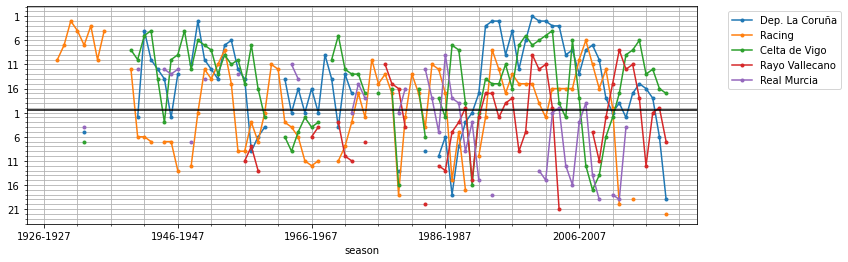

In [31]:
plot_ranking_evolution('Dep. La Coruña', 'Racing', 'Celta de Vigo', 'Rayo Vallecano', 'Real Murcia')

## Exercise 10

In [32]:
dfs = []
for season in df_past['season'].drop_duplicates():
    for division in df_past.loc[(df_past['season']==season), 'division'].drop_duplicates():
        df_games = df_past.loc[(df_past['season']==season) & (df_past['division']==division)]
        teams = df_games['home_team'].drop_duplicates().rename('team')
        init_data = [(season, division, 0, 0, 0, 0, 0, 0, 0, 0, []) for _ in teams]
        df_standings = pd.DataFrame(init_data, columns=['season', 'division', 'matchday', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts', 'last_5'], index=teams)
        for matchday in df_games['matchday'].drop_duplicates():
            df_standings['matchday'] += 1
            df_matchday = df_games.loc[df_games['matchday']==matchday]
            last_5 = df_standings['last_5'].apply(lambda x: x[:4])
            for i in df_matchday.index:
                game = df_matchday.loc[i, :]
                df_standings.loc[game['home_team'], 'GF'] += game['home_goals']
                df_standings.loc[game['home_team'], 'GA'] += game['away_goals']
                df_standings.loc[game['away_team'], 'GF'] += game['away_goals']
                df_standings.loc[game['away_team'], 'GA'] += game['home_goals']
                if game['result'] == '1':
                    df_standings.loc[game['home_team'], 'W'] += 1
                    df_standings.loc[game['home_team'], 'Pts'] += 3
                    df_standings.loc[game['away_team'], 'L'] += 1
                    last_5.loc[game['home_team']] = ["W"] + last_5.loc[game['home_team']]
                    last_5.loc[game['away_team']] = ["L"] + last_5.loc[game['away_team']]
                elif game['result'] == '2':
                    df_standings.loc[game['home_team'], 'L'] += 1
                    df_standings.loc[game['away_team'], 'W'] += 1
                    df_standings.loc[game['away_team'], 'Pts'] += 3
                    last_5.loc[game['home_team']] = ["L"] + last_5.loc[game['home_team']]
                    last_5.loc[game['away_team']] = ["W"] + last_5.loc[game['away_team']]
                else:
                    df_standings.loc[game['home_team'], 'T'] += 1
                    df_standings.loc[game['home_team'], 'Pts'] += 1
                    df_standings.loc[game['away_team'], 'T'] += 1
                    df_standings.loc[game['away_team'], 'Pts'] += 1
                    last_5.loc[game['home_team']] = ["T"] + last_5.loc[game['home_team']]
                    last_5.loc[game['away_team']] = ["T"] + last_5.loc[game['away_team']]
            df_standings['last_5'] = last_5
            df_standings['GD'] = (df_standings['GF'] - df_standings['GA']).astype(int)
            df_standings.sort_values(by=['Pts', 'GD', 'GF'], ascending=False, inplace=True)
            df_standings.reset_index(inplace=True)
            df_standings.insert(value=np.arange(1, len(df_standings)+1), loc=3, column='rank')
            dfs.append(df_standings[['season', 'division', 'matchday', 'rank', 'team', 'GF', 'GA', 'GD', 'W', 'L', 'T', 'Pts', 'last_5']].copy())
            df_standings.drop(columns=['rank'], inplace=True)
            df_standings.set_index(keys='team', drop=True, inplace=True)
df_standings_all_matchdays = pd.concat(dfs, ignore_index=True)
df_standings_all_matchdays.to_excel('../reports/MatchdayStandingsJannik.xlsx', index=False)
            